# Venture Funding with Deep Learning

You work as a risk management associate at Alphabet Soup, a venture capital firm. Alphabet Soup’s business team receives many funding applications from startups every day. This team has asked you to help them create a model that predicts whether applicants will be successful if funded by Alphabet Soup.

The business team has given you a CSV containing more than 34,000 organizations that have received funding from Alphabet Soup over the years. With your knowledge of machine learning and neural networks, you decide to use the features in the provided dataset to create a binary classifier model that will predict whether an applicant will become a successful business. The CSV file contains a variety of information about these businesses, including whether or not they ultimately became successful.

## Instructions:

The steps for this challenge are broken out into the following sections:

* Prepare the data for use on a neural network model.

* Compile and evaluate a binary classification model using a neural network.

* Optimize the neural network model.

### Prepare the Data for Use on a Neural Network Model 

Using your knowledge of Pandas and scikit-learn’s `StandardScaler()`, preprocess the dataset so that you can use it to compile and evaluate the neural network model later.

Open the starter code file, and complete the following data preparation steps:

1. Read the `applicants_data.csv` file into a Pandas DataFrame. Review the DataFrame, looking for categorical variables that will need to be encoded, as well as columns that could eventually define your features and target variables.   

2. Drop the “EIN” (Employer Identification Number) and “NAME” columns from the DataFrame, because they are not relevant to the binary classification model.
 
3. Encode the dataset’s categorical variables using `OneHotEncoder`, and then place the encoded variables into a new DataFrame.

4. Add the original DataFrame’s numerical variables to the DataFrame containing the encoded variables.

> **Note** To complete this step, you will employ the Pandas `concat()` function that was introduced earlier in this course. 

5. Using the preprocessed data, create the features (`X`) and target (`y`) datasets. The target dataset should be defined by the preprocessed DataFrame column “IS_SUCCESSFUL”. The remaining columns should define the features dataset. 

6. Split the features and target sets into training and testing datasets.

7. Use scikit-learn's `StandardScaler` to scale the features data.

### Compile and Evaluate a Binary Classification Model Using a Neural Network

Use your knowledge of TensorFlow to design a binary classification deep neural network model. This model should use the dataset’s features to predict whether an Alphabet Soup&ndash;funded startup will be successful based on the features in the dataset. Consider the number of inputs before determining the number of layers that your model will contain or the number of neurons on each layer. Then, compile and fit your model. Finally, evaluate your binary classification model to calculate the model’s loss and accuracy. 
 
To do so, complete the following steps:

1. Create a deep neural network by assigning the number of input features, the number of layers, and the number of neurons on each layer using Tensorflow’s Keras.

> **Hint** You can start with a two-layer deep neural network model that uses the `relu` activation function for both layers.

2. Compile and fit the model using the `binary_crossentropy` loss function, the `adam` optimizer, and the `accuracy` evaluation metric.

> **Hint** When fitting the model, start with a small number of epochs, such as 20, 50, or 100.

3. Evaluate the model using the test data to determine the model’s loss and accuracy.

4. Save and export your model to an HDF5 file, and name the file `AlphabetSoup.h5`. 

### Optimize the Neural Network Model

Using your knowledge of TensorFlow and Keras, optimize your model to improve the model's accuracy. Even if you do not successfully achieve a better accuracy, you'll need to demonstrate at least two attempts to optimize the model. You can include these attempts in your existing notebook. Or, you can make copies of the starter notebook in the same folder, rename them, and code each model optimization in a new notebook. 

> **Note** You will not lose points if your model does not achieve a high accuracy, as long as you make at least two attempts to optimize the model.

To do so, complete the following steps:

1. Define at least three new deep neural network models (the original plus 2 optimization attempts). With each, try to improve on your first model’s predictive accuracy.

> **Rewind** Recall that perfect accuracy has a value of 1, so accuracy improves as its value moves closer to 1. To optimize your model for a predictive accuracy as close to 1 as possible, you can use any or all of the following techniques:
>
> * Adjust the input data by dropping different features columns to ensure that no variables or outliers confuse the model.
>
> * Add more neurons (nodes) to a hidden layer.
>
> * Add more hidden layers.
>
> * Use different activation functions for the hidden layers.
>
> * Add to or reduce the number of epochs in the training regimen.

2. After finishing your models, display the accuracy scores achieved by each model, and compare the results.

3. Save each of your models as an HDF5 file.


In [1]:
# Imports
import pandas as pd
from pathlib import Path
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
%matplotlib inline

---

## Prepare the data to be used on a neural network model

### Step 1: Read the `applicants_data.csv` file into a Pandas DataFrame. Review the DataFrame, looking for categorical variables that will need to be encoded, as well as columns that could eventually define your features and target variables.  


In [2]:
# Read the applicants_data.csv file from the Resources folder into a Pandas DataFrame
applicant_data_df = pd.read_csv(Path("../Starter_Code/Resources/applicants_data.csv"))

# Review the DataFrame
# YOUR CODE HERE
applicant_data_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Review the data types associated with the columns
# YOUR CODE HERE
applicant_data_df.dtypes

EIN                        int64
NAME                      object
APPLICATION_TYPE          object
AFFILIATION               object
CLASSIFICATION            object
USE_CASE                  object
ORGANIZATION              object
STATUS                     int64
INCOME_AMT                object
SPECIAL_CONSIDERATIONS    object
ASK_AMT                    int64
IS_SUCCESSFUL              int64
dtype: object

### Step 2: Drop the “EIN” (Employer Identification Number) and “NAME” columns from the DataFrame, because they are not relevant to the binary classification model.

In [4]:
# Drop the 'EIN' and 'NAME' columns from the DataFrame
applicant_data_df = applicant_data_df.drop(columns=["EIN", "NAME"])

# Review the DataFrame
# YOUR CODE HERE
applicant_data_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


### Step 3: Encode the dataset’s categorical variables using `OneHotEncoder`, and then place the encoded variables into a new DataFrame.

In [5]:
# Create a list of categorical variables 
categorical_variables = list(applicant_data_df.dtypes[applicant_data_df.dtypes== "object"].index)

# Display the categorical variables list
# YOUR CODE HERE
categorical_variables

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [6]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)


In [7]:
# Encode the categorcal variables using OneHotEncoder
encoded_data = enc.fit_transform(applicant_data_df[categorical_variables])

In [8]:
# Create a DataFrame with the encoded variables
encoded_df = pd.DataFrame(encoded_data, columns= enc.get_feature_names(categorical_variables))

# Review the DataFrame
# YOUR CODE HERE
encoded_df.head()

,APPLICATION_TYPE_T10,APPLICATION_TYPE_T12,APPLICATION_TYPE_T13,APPLICATION_TYPE_T14,APPLICATION_TYPE_T15,APPLICATION_TYPE_T17,APPLICATION_TYPE_T19,APPLICATION_TYPE_T2,APPLICATION_TYPE_T25,APPLICATION_TYPE_T29,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Step 4: Add the original DataFrame’s numerical variables to the DataFrame containing the encoded variables.

> **Note** To complete this step, you will employ the Pandas `concat()` function that was introduced earlier in this course. 

In [9]:
# Add the numerical variables from the original DataFrame to the one-hot encoding DataFrame
applicant_data_df_numerical = applicant_data_df[["ASK_AMT", "IS_SUCCESSFUL", "STATUS"]]
encoded_df = pd.concat([encoded_df, applicant_data_df_numerical], axis=1)

# Review the Dataframe
# YOUR CODE HERE
encoded_df.head()

,APPLICATION_TYPE_T10,APPLICATION_TYPE_T12,APPLICATION_TYPE_T13,APPLICATION_TYPE_T14,APPLICATION_TYPE_T15,APPLICATION_TYPE_T17,APPLICATION_TYPE_T19,APPLICATION_TYPE_T2,APPLICATION_TYPE_T25,APPLICATION_TYPE_T29,...,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y,ASK_AMT,IS_SUCCESSFUL,STATUS
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5000,1,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,108590,1,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5000,0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,6692,1,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,142590,1,1


### Step 5: Using the preprocessed data, create the features (`X`) and target (`y`) datasets. The target dataset should be defined by the preprocessed DataFrame column “IS_SUCCESSFUL”. The remaining columns should define the features dataset. 



In [10]:
# Define the target set y using the IS_SUCCESSFUL column
y = encoded_df["IS_SUCCESSFUL"]

# Display a sample of y
# YOUR CODE HERE
y[:5]

0    1
1    1
2    0
3    1
4    1
Name: IS_SUCCESSFUL, dtype: int64

In [11]:
# Define features set X by selecting all columns but IS_SUCCESSFUL
X = encoded_df.drop(columns= "IS_SUCCESSFUL")

# Review the features DataFrame
# YOUR CODE HERE
X.head()

,APPLICATION_TYPE_T10,APPLICATION_TYPE_T12,APPLICATION_TYPE_T13,APPLICATION_TYPE_T14,APPLICATION_TYPE_T15,APPLICATION_TYPE_T17,APPLICATION_TYPE_T19,APPLICATION_TYPE_T2,APPLICATION_TYPE_T25,APPLICATION_TYPE_T29,...,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y,ASK_AMT,STATUS
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5000,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,108590,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5000,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,6692,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,142590,1


### Step 6: Split the features and target sets into training and testing datasets.


In [12]:
# Split the preprocessed data into a training and testing dataset
# Assign the function a random_state equal to 1
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1)


### Step 7: Use scikit-learn's `StandardScaler` to scale the features data.

In [13]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to the features training dataset
X_scaler = scaler.fit(X_train)

# Fit the scaler to the features training dataset
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


---

## Compile and Evaluate a Binary Classification Model Using a Neural Network

### Step 1: Create a deep neural network by assigning the number of input features, the number of layers, and the number of neurons on each layer using Tensorflow’s Keras.

> **Hint** You can start with a two-layer deep neural network model that uses the `relu` activation function for both layers.


In [14]:
# Define the the number of inputs (features) to the model
number_input_features = len(X_train.iloc[0])

# Review the number of features
number_input_features


116

In [15]:
# Define the number of neurons in the output layer
number_output_neurons = 1

In [16]:
# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer1 =  (number_input_features + 1) //2

# Review the number hidden nodes in the first layer
hidden_nodes_layer1


58

In [17]:
# Define the number of hidden nodes for the second hidden layer
hidden_nodes_layer2 =  (hidden_nodes_layer1 +1) //2
#adding one so the amount of hidden nodes is an even number
hidden_nodes_layer2 = hidden_nodes_layer2 + 1

# Review the number hidden nodes in the second layer
hidden_nodes_layer2


30

In [18]:
# Create the Sequential model instance
nn = Sequential()


In [19]:
# Add the first hidden layer
nn.add(Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))


In [20]:
# Add the second hidden layer
nn.add(Dense(units=hidden_nodes_layer2, activation="relu"))


In [21]:
# Add the output layer to the model specifying the number of output neurons and activation function
# YOUR CODE HERE
nn.add(Dense(units=number_output_neurons, activation="sigmoid"))

In [22]:
# Display the Sequential model summary
# YOUR CODE HERE
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 58)                6786      
                                                                 
 dense_1 (Dense)             (None, 30)                1770      
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 8,587
Trainable params: 8,587
Non-trainable params: 0
_________________________________________________________________


### Step 2: Compile and fit the model using the `binary_crossentropy` loss function, the `adam` optimizer, and the `accuracy` evaluation metric.


In [23]:
# Compile the Sequential model
# YOUR CODE HERE
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [24]:
# Fit the model using 50 epochs and the training data
# YOUR CODE HERE
model = nn.fit(X_train, y_train, epochs=50)

Epoch 1/50
804/804 [==============================] - 5s 4ms/step - loss: 24699.5371 - accuracy: 0.4886
Epoch 2/50
804/804 [==============================] - 4s 5ms/step - loss: 31552.4922 - accuracy: 0.5111
Epoch 3/50
804/804 [==============================] - 5s 7ms/step - loss: 12984.2461 - accuracy: 0.4967
Epoch 4/50
804/804 [==============================] - 5s 6ms/step - loss: 10133.9863 - accuracy: 0.4951
Epoch 5/50
804/804 [==============================] - 5s 6ms/step - loss: 28227.8809 - accuracy: 0.5114
Epoch 6/50
804/804 [==============================] - 4s 5ms/step - loss: 39912.2539 - accuracy: 0.5051
Epoch 7/50
804/804 [==============================] - 6s 7ms/step - loss: 34905.5469 - accuracy: 0.4911: 0s - loss: 35886.8125 - accura
Epoch 8/50
804/804 [==============================] - 6s 7ms/step - loss: 15884.3340 - accuracy: 0.5114
Epoch 9/50
804/804 [==============================] - 7s 9ms/step - loss: 5766.8706 - accuracy: 0.5108A: 5s 
Epoch 10/50
804/804 [======

### Step 3: Evaluate the model using the test data to determine the model’s loss and accuracy.


In [25]:
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled, y_test, verbose=2)

# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.7519 - accuracy: 0.6941 - 860ms/epoch - 3ms/step
Loss: 0.7518863677978516, Accuracy: 0.6941108107566833


### Step 4: Save and export your model to an HDF5 file, and name the file `AlphabetSoup.h5`. 


In [26]:
# Set the model's file path
file_path = Path("./AlphabetSoup.h5")

# Export your model to a HDF5 file
# YOUR CODE HERE
nn.save(file_path)

---

## Optimize the neural network model


### Step 1: Define at least three new deep neural network models (resulting in the original plus 3 optimization attempts). With each, try to improve on your first model’s predictive accuracy.

> **Rewind** Recall that perfect accuracy has a value of 1, so accuracy improves as its value moves closer to 1. To optimize your model for a predictive accuracy as close to 1 as possible, you can use any or all of the following techniques:
>
> * Adjust the input data by dropping different features columns to ensure that no variables or outliers confuse the model.
>
> * Add more neurons (nodes) to a hidden layer.
>
> * Add more hidden layers.
>
> * Use different activation functions for the hidden layers.
>
> * Add to or reduce the number of epochs in the training regimen.


### Alternative Model 1

In [27]:
# Creating model with only one hidden layer
# Define the the number of inputs (features) to the model
number_input_features_A1 = len(X_train.iloc[0])

# Review the number of features
number_input_features_A1

116

In [28]:
# Define the number of neurons in the output layer
number_output_neurons_A1 = 1

In [29]:
# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer1_A1 = (number_input_features + 1) // 2

# Review the number of hidden nodes in the first layer
hidden_nodes_layer1_A1

58

In [30]:
# Create the Sequential model instance
nn_A1 = Sequential()

In [31]:
# First hidden layer
nn_A1.add(Dense(units=hidden_nodes_layer1_A1, input_dim= number_input_features_A1, activation="relu"))


# Output layer
nn_A1.add(Dense(units=number_output_neurons, activation="sigmoid"))


# Check the structure of the model
nn_A1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 58)                6786      
                                                                 
 dense_4 (Dense)             (None, 1)                 59        
                                                                 
Total params: 6,845
Trainable params: 6,845
Non-trainable params: 0
_________________________________________________________________


In [32]:
# Compile the Sequential model
nn_A1.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [33]:
# Fit the model using 110 epochs and the training data
model_A1 = nn_A1.fit(X_train_scaled, y_train, epochs=100)


Epoch 1/100
804/804 [==============================] - 4s 4ms/step - loss: 0.5814 - accuracy: 0.7182
Epoch 2/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5585 - accuracy: 0.7292
Epoch 3/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5541 - accuracy: 0.7296
Epoch 4/100
804/804 [==============================] - 4s 5ms/step - loss: 0.5516 - accuracy: 0.7318
Epoch 5/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5505 - accuracy: 0.7318
Epoch 6/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5493 - accuracy: 0.7310: 0s - loss: 0.5482 - 
Epoch 7/100
804/804 [==============================] - 4s 5ms/step - loss: 0.5485 - accuracy: 0.7323
Epoch 8/100
804/804 [==============================] - 5s 6ms/step - loss: 0.5477 - accuracy: 0.7314
Epoch 9/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5470 - accuracy: 0.7322
Epoch 10/100
804/804 [==============================] - 4s 5ms/step -

#### Alternative Model 2

In [34]:
# Define the the number of inputs (features) to the model
number_input_features_A2 = len(X_train.iloc[0])

# Review the number of features
number_input_features_A2

116

In [35]:
# Define the number of neurons in the output layer
number_output_neurons_A2 = 1

In [36]:
# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer1_A2 = (number_input_features + 1) //2

# Review the number of hidden nodes in the first layer
hidden_nodes_layer1_A2

58

In [46]:
# Adding second hidden layer
hidden_nodes_layer2_A2 = (hidden_nodes_layer1_A1 + 1) //2
#adding one so the amount of hidden nodes is an even number
hidden_nodes_layer2_A2 = hidden_nodes_layer2_A2 + 1
# Review the number of hidden nodes in the second layer
hidden_nodes_layer2_A2

30

In [48]:
# Adding third hidden layer
hidden_nodes_layer3_A2 = (hidden_nodes_layer2_A2 +1) // 2
#adding one so the amount of hidden nodes is an even number
hidden_nodes_layer3_A2 = hidden_nodes_layer3_A2 + 1
# Review the number of hidden nodes in the third layer
hidden_nodes_layer3_A2

16

In [49]:
# Create the Sequential model instance
nn_A2 = Sequential()

In [50]:
# First hidden layer
nn_A2.add(Dense(units=hidden_nodes_layer1_A2, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn_A2.add(Dense(units=hidden_nodes_layer2_A2, activation="relu"))

# Third hidden layer
nn_A2.add(Dense(units=hidden_nodes_layer3_A2, activation="relu"))

# Output layer
nn_A2.add(Dense(units=number_output_neurons_A2, activation="sigmoid"))

# Check the structure of the model
nn_A2.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 58)                6786      
                                                                 
 dense_10 (Dense)            (None, 30)                1770      
                                                                 
 dense_11 (Dense)            (None, 16)                496       
                                                                 
 dense_12 (Dense)            (None, 1)                 17        
                                                                 
Total params: 9,069
Trainable params: 9,069
Non-trainable params: 0
_________________________________________________________________


In [51]:
# Compile the model
nn_A2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [52]:
# Fit the model
model_A2 = nn_A2.fit(X_train_scaled, y_train, epochs=150)

Epoch 1/150
804/804 [==============================] - 1s 1ms/step - loss: 0.5731 - accuracy: 0.7151
Epoch 2/150
804/804 [==============================] - 1s 936us/step - loss: 0.5513 - accuracy: 0.7307
Epoch 3/150
804/804 [==============================] - 1s 1ms/step - loss: 0.5480 - accuracy: 0.7308
Epoch 4/150
804/804 [==============================] - 1s 1ms/step - loss: 0.5460 - accuracy: 0.7325
Epoch 5/150
804/804 [==============================] - 1s 1ms/step - loss: 0.5447 - accuracy: 0.7328
Epoch 6/150
804/804 [==============================] - 1s 1ms/step - loss: 0.5440 - accuracy: 0.7350
Epoch 7/150
804/804 [==============================] - 1s 1ms/step - loss: 0.5429 - accuracy: 0.7347
Epoch 8/150
804/804 [==============================] - 1s 1ms/step - loss: 0.5428 - accuracy: 0.7335
Epoch 9/150
804/804 [==============================] - 1s 1ms/step - loss: 0.5412 - accuracy: 0.7357
Epoch 10/150
804/804 [==============================] - 1s 1ms/step - loss: 0.5406 - accu

### Step 2: After finishing your models, display the accuracy scores achieved by each model, and compare the results.

In [53]:
# Orginal model used two hidden layers and 50 epochs
print("Original Model Results")

# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled, y_test, verbose=2)

# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Original Model Results
268/268 - 0s - loss: 0.7519 - accuracy: 0.6941 - 152ms/epoch - 567us/step
Loss: 0.7518863677978516, Accuracy: 0.6941108107566833


<AxesSubplot:>

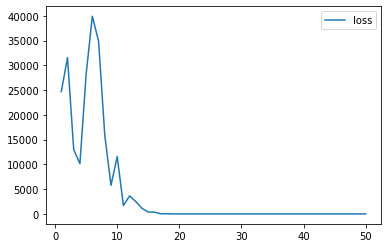

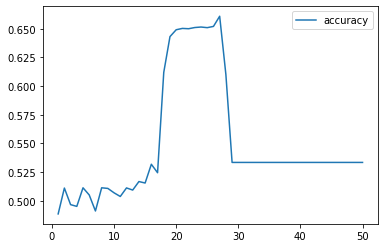

In [54]:
# Plotting the data to see if more epochs can help my model predict with less loss and more accuracy
nn_plot = pd.DataFrame(model.history, index=range(1, len(model.history["loss"]) + 1))
nn_plot.plot(y="loss")
nn_plot.plot(y="accuracy")

In [55]:
# The second model used one hidden layer and 100 epochs
print("Alternative Model 1 Results")

# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn_A1.evaluate(X_test_scaled, y_test, verbose=2)

# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Alternative Model 1 Results
268/268 - 0s - loss: 0.5707 - accuracy: 0.7301 - 250ms/epoch - 932us/step
Loss: 0.5706931948661804, Accuracy: 0.7301457524299622


<AxesSubplot:>

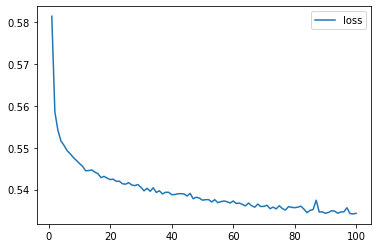

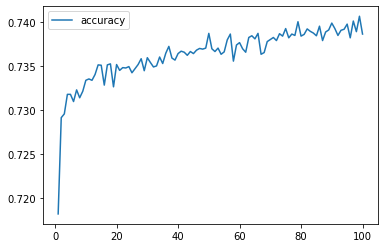

In [56]:
# Plotting the data to see if more epochs can help my model predict with less loss and more accuracy
nn_A1_plot = pd.DataFrame(model_A1.history, index=range(1, len(model_A1.history["loss"]) + 1))
nn_A1_plot.plot(y="loss")
nn_A1_plot.plot(y="accuracy")

In [57]:
# The third model used three hidden layers and 150 epochs
print("Alternative Model 2 Results")

# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn_A2.evaluate(X_test_scaled, y_test, verbose=2)

# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Alternative Model 2 Results
268/268 - 0s - loss: 0.5676 - accuracy: 0.7304 - 252ms/epoch - 942us/step
Loss: 0.5676047801971436, Accuracy: 0.7303789854049683


<AxesSubplot:>

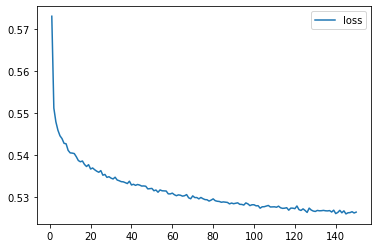

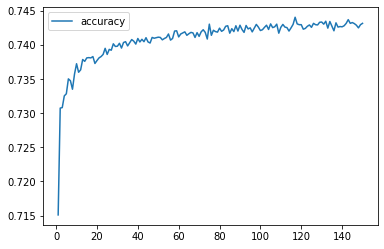

In [58]:
# Plotting the data to see if more epochs can help my model predict with less loss and more accuracy
nn_A2_plot = pd.DataFrame(model_A2.history, index=range(1, len(model_A2.history["loss"]) + 1))
nn_A2_plot.plot(y="loss")
nn_A2_plot.plot(y="accuracy")

### Step 3: Save each of your alternative models as an HDF5 file.


In [59]:
# Set the file path for the first alternative model
file_path1 = Path("./AlphabetSoup1.h5")

# Export your model to a HDF5 file
nn_A1.save(file_path)


In [60]:
# Set the file path for the second alternative model
file_path2 = Path("./AlphabetSoup2.h5")

# Export your model to a HDF5 file
nn_A2.save(file_path)